# 1 Ons Altın Fiyat Endeksi (Ocak 1999 = 100)

Bu notebook, 1 Ons Altın fiyatının çeşitli kilit para birimleri karşısındaki performansını karşılaştıracaktır.

**Amaç:** "Eğer 1999 yılı başında 1 Ons Altın'ın fiyatı '100 birim' olsaydı, bugün kaç birim olurdu?" sorusuna cevap vererek tüm para birimlerinin altına karşı *göreceli* performansını tek bir grafikte göstermektir.

**Kilit Para Birimleri:**
* `United States(USD)`
* `Europe(EUR)`
* `United Kingdom(GBP)`
* `Japan(JPY)`
* `Turkey(TRY)`

**Metodoloji:**
1.  Veri yüklenir ve `Date` sütunu `datetime` formatına dönüştürülür.
2.  Grafik için **1 Ocak 1999** tarihi (Euro'nun resmi başlangıç tarihi) baz alınır. Veri bu tarihten itibaren filtrelenir.
3.  Bu kilit para birimlerinin 1999'daki ilk değeri (baz değeri) bulunur.
4.  Tüm serideki değerler, kendi baz değerine bölünür ve 100 ile çarpılır. `(Değer / Baz_Değer) * 100`
5.  Sonuç olarak, 1999 başında tüm para birimlerinin endeks değeri '100' olur ve zaman içindeki değişimleri (altına karşı değer kayıpları) net bir şekilde karşılaştırılır.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import warnings

# Uyarıları bastır
warnings.filterwarnings("ignore")

# Grafiklerin notebook içinde görünmesi için
%matplotlib inline

## Adım 1: Veri Yükleme ve Tarih Dönüşümü

Her zamanki gibi, veriyi yüklüyor ve `Date` sütununu doğru formata çeviriyoruz.

In [4]:
file_path = "../data/1979-2021.csv"
df = pd.read_csv(file_path)

# 'Date' sütununu datetime formatına çevir
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       511 non-null    datetime64[ns]
 1   United States(USD)         511 non-null    float64       
 2   Europe(EUR)                511 non-null    float64       
 3   Japan(JPY)                 511 non-null    float64       
 4   United Kingdom(GBP)        511 non-null    float64       
 5   Canada(CAD)                511 non-null    float64       
 6   Switzerland(CHF)           511 non-null    float64       
 7   India(INR)                 511 non-null    float64       
 8   China(CNY)                 439 non-null    float64       
 9   Turkey(TRY)                464 non-null    float64       
 10  Saudi Arabia(SAR)          511 non-null    float64       
 11  Indonesia(IDR)             511 non-null    float64       
 12  United A

## Adım 2: Veriyi Filtreleme ve Hazırlama

1.  Analizimiz için `Date`, `USD`, `EUR`, `GBP`, `JPY`, `TRY` sütunlarını seçiyoruz.
2.  Analiz başlangıç tarihimiz olan **1 Ocak 1999**'dan (Euro'nun başlangıcı) itibaren veriyi filtreliyoruz.
3.  Bu tarihten sonra bu 5 para biriminden herhangi birinde eksik veri (`NaN`) olup olmadığını kontrol edip (varsa) temizliyoruz.

In [5]:
# Analiz edilecek ana para birimleri
key_currencies = ['United States(USD)', 'Europe(EUR)', 'United Kingdom(GBP)', 'Japan(JPY)', 'Turkey(TRY)']

# 1. Başlangıç tarihini belirle
start_date = '1999-01-01'

# 2. Veriyi tarihe göre filtrele
df_filtered = df[df['Date'] >= start_date].copy()

# 3. Sadece ilgili sütunları seç ve eksik verileri temizle
df_keys = df_filtered[['Date'] + key_currencies].dropna()

print("Verinin başlangıç noktası (1999):")
print(df_keys.head())

Verinin başlangıç noktası (1999):
          Date  United States(USD)  Europe(EUR)  United Kingdom(GBP)  \
240 1999-01-29               285.4        251.3                173.7   
241 1999-02-26               287.1        261.5                179.2   
242 1999-03-31               279.5        258.9                173.1   
243 1999-04-30               286.6        270.9                178.0   
244 1999-05-31               268.6        257.6                167.5   

     Japan(JPY)  Turkey(TRY)  
240     33186.3         95.2  
241     34058.5        101.8  
242     33095.3        104.3  
243     34210.0        112.2  
244     32714.1        109.2  


## Adım 3: Veriyi Endeksleme (Indexing)

Bu, analizin kilit noktasıdır. Tüm para birimlerinin 1999'daki ilk değerini '100'e eşitleyeceğiz.

In [6]:
# 'Date' sütununu geçici olarak index yapalım
df_indexed = df_keys.set_index('Date')

# 1. Baz değerleri al (ilk satırın değerleri)
baseline_values = df_indexed.iloc[0]

# 2. Endeksleme: (Her değeri baz değere böl) * 100
df_normalized = (df_indexed / baseline_values) * 100

print("Endekslenmiş Verinin Başı (Tümü 100 olmalı):")
print(df_normalized.head())

print("\nEndekslenmiş Verinin Sonu (Değişim):")
print(df_normalized.tail())

Endekslenmiş Verinin Başı (Tümü 100 olmalı):
            United States(USD)  Europe(EUR)  United Kingdom(GBP)  Japan(JPY)  \
Date                                                                           
1999-01-29          100.000000   100.000000           100.000000  100.000000   
1999-02-26          100.595655   104.058894           103.166379  102.628193   
1999-03-31           97.932726   103.024274            99.654577   99.725790   
1999-04-30          100.420463   107.799443           102.475533  103.084707   
1999-05-31           94.113525   102.506964            96.430628   98.577124   

            Turkey(TRY)  
Date                     
1999-01-29   100.000000  
1999-02-26   106.932773  
1999-03-31   109.558824  
1999-04-30   117.857143  
1999-05-31   114.705882  

Endekslenmiş Verinin Sonu (Değişim):
            United States(USD)  Europe(EUR)  United Kingdom(GBP)  Japan(JPY)  \
Date                                                                           
2021-03-31    

## Adım 4: Veriyi "Eritme" (Melting)

`seaborn`'un tüm para birimlerini tek grafikte, farklı renklerle ve bir lejantla (gösterge) çizebilmesi için "geniş" (wide) formatlı verimizi (her para birimi bir sütun) "uzun" (long) formata çevirmemiz gerekir. `pd.melt()` bunun içindir.

In [7]:
# 'Date' sütununu indeksten geri getir
df_normalized = df_normalized.reset_index()

# Veriyi "erit" (melt)
df_long = df_normalized.melt(
    id_vars='Date',                 # X ekseni olacak sütun
    var_name='Currency',            # Para birimlerinin toplanacağı yeni sütun
    value_name='Indexed Value'      # Endeks değerlerinin toplanacağı yeni sütun
)

print("Eritilmiş (Long-Format) Veri:")
print(df_long.sample(10)) # Rastgele 10 satır göster

Eritilmiş (Long-Format) Veri:
           Date             Currency  Indexed Value
485  2016-11-30          Europe(EUR)     441.941902
117  2008-10-31   United States(USD)     256.061668
111  2008-04-30   United States(USD)     305.185704
284  2000-02-29          Europe(EUR)     121.368882
792  2019-11-29  United Kingdom(GBP)     649.856074
1195 2008-04-30          Turkey(TRY)    1168.487395
463  2015-01-30          Europe(EUR)     444.409073
1208 2009-05-29          Turkey(TRY)    1582.668067
445  2013-07-31          Europe(EUR)     393.951452
455  2014-05-30          Europe(EUR)     364.663749


## Adım 5: Görselleştirme (Logaritmik Ölçek)

Artık verimiz grafiğe hazır. `Turkey(TRY)`'nin performansı diğerlerinden *o kadar* farklı ki (örn: USD %500 artarken TRY %10,000 artmış olabilir), normal bir grafikte diğer para birimleri düz çizgi gibi görünür.

Bunu çözmek için Y eksenini **Logaritmik Ölçek (Log Scale)** olarak ayarlayacağız. Bu sayede hem küçük değişimleri (örn: 100'den 300'e) hem de devasa değişimleri (örn: 100'den 10000'e) aynı grafikte net bir şekilde görebiliriz.

İyileştirilmiş grafik 'gold_price_index_log_plot_final.png' adıyla başarıyla kaydedildi.


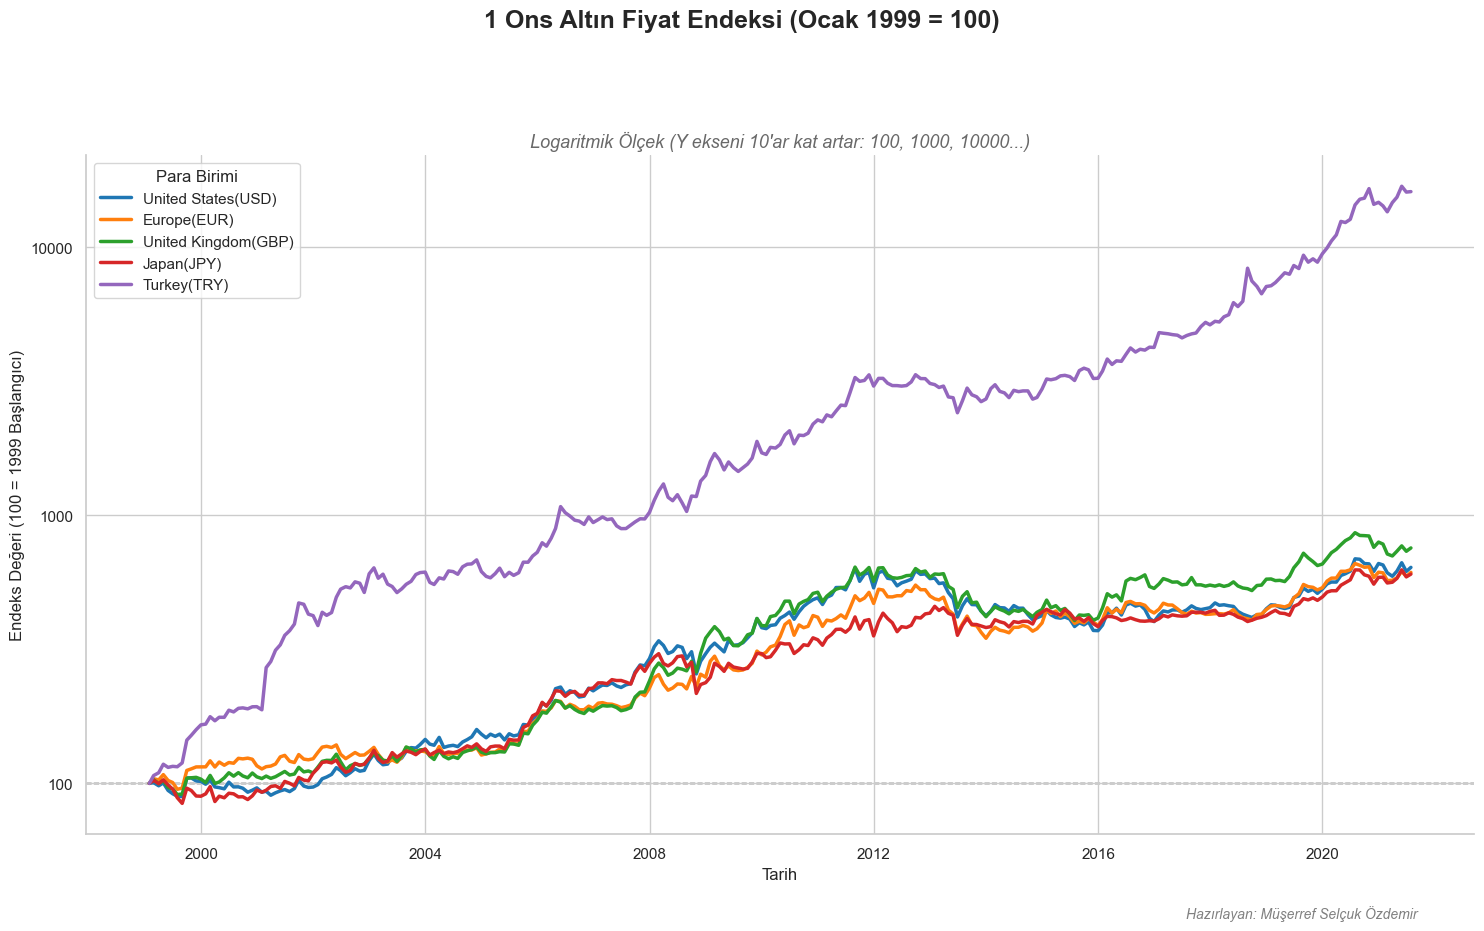

In [10]:
# 1. Tema ve figür boyutunu ayarla (İmza için 'fig' objesi gerekli)
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(15, 9))

# 2. Çizgi grafiğini oluştur
sns.lineplot(
    data=df_long,
    x='Date',
    y='Indexed Value',
    hue='Currency',         # 'Currency' sütununa göre renklendir
    linewidth=2.5,
    palette='tab10',        # Okunaklı bir renk paleti
    ax=ax
)

# 3. Y Eksenini Logaritmik Ölçeğe ayarla
ax.set_yscale('log')
# Y eksenindeki logaritmik sayıları normal formatla (100, 1000, 10000)
ax.yaxis.set_major_formatter(ScalarFormatter())

# 4. Başlangıç çizgisi (100) ekle (zorder=0 ile çizgilerin arkasına gönder)
ax.axhline(100, ls='--', color='black', lw=1, zorder=0)

# 5. Başlık ve Alt Başlık (İyileştirme)
fig.suptitle(
    '1 Ons Altın Fiyat Endeksi (Ocak 1999 = 100)', 
    fontsize=18, 
    fontweight='bold',
    y=1.02 # Ana başlığı biraz yukarı al
)
ax.set_title(
    'Logaritmik Ölçek (Y ekseni 10\'ar kat artar: 100, 1000, 10000...)',
    fontsize=13,
    style='italic',
    color='dimgray'
)

# 6. Eksen Etiketleri
ax.set_xlabel('Tarih', fontsize=12)
ax.set_ylabel('Endeks Değeri (100 = 1999 Başlangıcı)', fontsize=12)

# 7. Lejantı (Gösterge) sol üste taşı (İyileştirme)
ax.legend(title='Para Birimi', loc='upper left', frameon=True)

# 8. Çerçeveyi temizle (İyileştirme)
sns.despine(fig=fig) 

# 9. Kenar boşluklarını ayarla (Başlık ve imza için yer aç)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# 10. İmza Ekleme (Yeni İstek)
fig.text(0.95,  # X: %95 (sağdan %5 içeride)
         0.01,  # Y: %1 (alttan %1 yukarıda)
         'Hazırlayan: Müşerref Selçuk Özdemir', 
         horizontalalignment='right', 
         fontsize=10, 
         color='grey',
         fontstyle='italic')

# 11. Grafiği kaydet (Daha yüksek çözünürlük için dpi eklendi)
# plt.savefig("gold_price_index_log_plot_final.png", dpi=150)

print("İyileştirilmiş grafik 'gold_price_index_log_plot_final.png' adıyla başarıyla kaydedildi.")

# Jupyter Notebook'ta göstermek için:
plt.show()